# Class Workbook

## In class activity

In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
import plotly.express as px
import statsmodels.formula.api as sm
#import ISLP as islp

import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

### Ames Housing data


Please take a look at the Ames Hoursing data.

In [6]:
ames_raw=pd.read_csv("ames_raw.csv")
ames_raw = ames_raw.select_dtypes(include=['int64', 'float64'])
ames_raw = ames_raw.dropna()

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [7]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the following loss function calculator.

In [8]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Use a simple neural network model.

In [9]:
# nnfit_2008= # ["your model here"] # use ames_raw_2008
from sklearn.preprocessing import StandardScaler

features = ["MS SubClass", "Lot Frontage", "Lot Area", "Misc Val", "Mo Sold"]

ames_raw_2008 = ames_raw_2008.dropna(axis = 0, how="any", subset=features)


X = ames_raw_2008[features].to_numpy()
y = ames_raw_2008["SalePrice"].to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_tensor = torch.from_numpy(X_train).float()
y_tensor = torch.from_numpy(y).float()

dataset =  TensorDataset(X_tensor, y_tensor)
# dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

# model = LinearRegression()

class nnModel(nn.Module):

    def __init__(self):
        super(nnModel, self).__init__()
        # self.flatten = nn.Flatten(start_dim=1)
        self.sequential = nn.Sequential(
            nn.Linear(5, 20),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(20, 1))

    def forward(self, x):
        # x = self.flatten(x)
        return self.sequential(x)


model = nnModel()

# criterion = nn.BCEWithLogitsLoss()
criterion = nn.MSELoss()
optimizer = RMSprop(model.parameters(), lr=0.01)
model.train()

for epoch in range(100):
    for input, target in dataset:
        optimizer.zero_grad()
        # print(input)
        output = model(input).squeeze()

        # RMSE,operation_loss = calc_loss(output, target)
        # loss = RMSE*500 + operation_loss
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        # print(loss)
        # print(output.shape)
        # print(target.shape)
        # print(output)
        # print(target)
        

nnfit_2008 = model


In [37]:
X_test = ames_raw_2009[features].values
X_test = scaler.transform(X_test)
X_test_tensor = torch.from_numpy(X_test).float()
nnfit_2008.eval()
pred_2009 = nnfit_2008(X_test_tensor).squeeze() # Predict using ames_raw_2009

pred_2009 = pred_2009.detach().numpy()
print(pred_2009[:5])
print(ames_raw_2009.SalePrice[:5])
print(calc_loss(pred_2009,ames_raw_2009.SalePrice))


(1319, 37)
(1319,)


When you decide on your model use the following to come up with your test loss.

Try to answer the following additional questions.

- Does your model indicate a good fit?


- How does your model result compare to the previous models you fit?


- Can you explain what feature was important determinant of the price?

### COVID 19 Survival in Mexico

Let's revisit COVID-19 in Mexico dataset from the [Mexican government](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico).  This data is a version downloaded from [Kaggle](https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download).  The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: COVID test findings. Values 1-3 mean that the patient was diagnosed with COVID in different degrees. 4 or higher means that the patient is not a carrier of COVID or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [11]:
import zipfile
Train_COVID= pd.read_csv('Train_COVID.zip',compression='zip')
Test_COVID= pd.read_csv('Test_COVID.zip',compression='zip')

- Fit a sequence model that predicts the number of cases a week a head.

- Modify your model to make prediction for different gender.


Your code:

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


def preprocess_data(data, look_back=1):
    data = data[data['CLASIFFICATION_FINAL'] <= 3]  # Filter confirmed cases
    data['DATE_DIED'] = pd.to_datetime(data['DATE_DIED'], errors='coerce')  # Assuming there's a 'date' column
    data = data.set_index('DATE_DIED').resample('W').count()['CLASIFFICATION_FINAL']  # Weekly counts
    data = np.array(data).reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    # Create dataset for sequence prediction
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Using last 3 weeks' data to predict the next week
X_train, y_train = preprocess_data(Train_COVID, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

/var/folders/k3/f6hz6yyx4m5_t7__6mnw1b6r0000gn/T/ipykernel_71197/2847834208.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
/var/folders/k3/f6hz6yyx4m5_t7__6mnw1b6r0000gn/T/ipykernel_71197/2847834208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/10
98/98 - 1s - loss: 0.0497 - 603ms/epoch - 6ms/step
Epoch 2/10
98/98 - 0s - loss: 0.0363 - 50ms/epoch - 506us/step
Epoch 3/10
98/98 - 0s - loss: 0.0293 - 51ms/epoch - 516us/step
Epoch 4/10
98/98 - 0s - loss: 0.0287 - 50ms/epoch - 509us/step
Epoch 5/10
98/98 - 0s - loss: 0.0310 - 50ms/epoch - 514us/step
Epoch 6/10
98/98 - 0s - loss: 0.0282 - 50ms/epoch - 512us/step
Epoch 7/10
98/98 - 0s - loss: 0.0279 - 49ms/epoch - 499us/step
Epoch 8/10
98/98 - 0s - loss: 0.0276 - 50ms/epoch - 507us/step
Epoch 9/10
98/98 - 0s - loss: 0.0285 - 49ms/epoch - 500us/step
Epoch 10/10
98/98 - 0s - loss: 0.0280 - 49ms/epoch - 497us/step


In [13]:
X_test, y_test = preprocess_data(Test_COVID, look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction = model.predict(X_test)

/var/folders/k3/f6hz6yyx4m5_t7__6mnw1b6r0000gn/T/ipykernel_71197/2847834208.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
/var/folders/k3/f6hz6yyx4m5_t7__6mnw1b6r0000gn/T/ipykernel_71197/2847834208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3/3 [==============================] - 0s 1ms/step


Your answer:

~~~
Please write your answer in full sentences.


~~~

## Problem set

### Writing your own gradient decent

Consider the simple function $R(\beta) = sin(\beta) + \beta/10$.

(a) Draw a graph of this function over the range $\beta \in [−6, 6]$.
Your code:

In [ ]:
#
#

(b) What is the derivative of this function?

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Given $\beta_0 = 2.3$, run gradient descent to find a local minimum of $R(\beat)$ using a learning rate of $\rho= 0.1$. Show each of $\beta_0,\beta_1,\dots$ in your plot, as well as the final answer.

Your code:

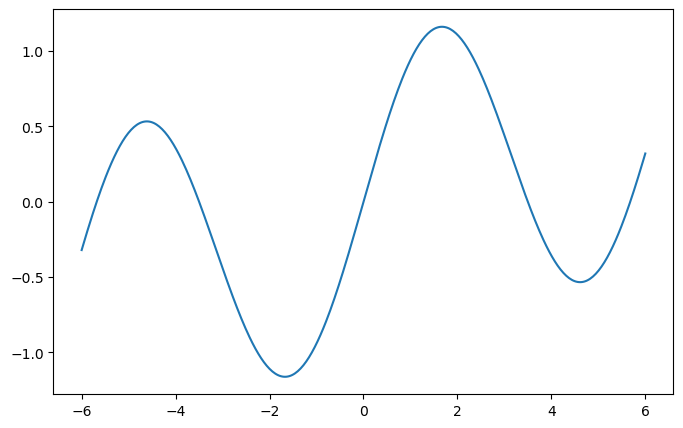

In [3]:
def R(beta):
    return np.sin(beta) + beta / 10

beta = np.linspace(-6, 6, 400)
values = R(beta)

plt.figure(figsize=(8, 5))
plt.plot(beta, values, label=r'$R(\beta) = \sin(\beta) + \frac{\beta}{10}$')


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Repeat with $\beta_0 = 1.4$.

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### Default

Fit a neural network to the Default data. Use a single hidden layer with 10 units, and dropout regularization. Have a look at Labs 10.9.1–10.9.2 for guidance. Compare the classification performance of your model with that of linear logistic regression.

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### IMDb

Repeat the analysis of Lab 10.9.5 on the IMDb data using a similarly structured neural network. We used 16 hidden units at each of two hidden layers. Explore the effect of increasing this to 32 and 64 units per layer, with and without 30% dropout regularization.

Your code:

In [24]:
import ISLP as islp
from ISLP.torch.imdb import (load_lookup,
                             load_tensor,
                             load_sparse,
                             load_sequential)
from ISLP.torch import (SimpleDataModule,
                        SimpleModule,
                        ErrorTracker,
                        rec_num_workers)
from torchinfo import summary


In [20]:
(imdb_seq_train,
 imdb_seq_test) = load_sequential(root='data/IMDB')
padded_sample = np.asarray(imdb_seq_train.tensors[0][0])
sample_review = padded_sample[padded_sample > 0][:12]
sample_review[:12]
lookup = load_lookup(root='data/IMDB')
' '.join(lookup[i] for i in sample_review)
max_num_workers=10
(imdb_train,
 imdb_test) = load_tensor(root='data/IMDB')
imdb_dm = SimpleDataModule(imdb_train,
                           imdb_test,
                           validation=2000,
                           num_workers=min(6, max_num_workers),
                           batch_size=512)


In [22]:
class IMDBModel(nn.Module):

    def __init__(self, input_size):
        super(IMDBModel, self).__init__()
        self.dense1 = nn.Linear(input_size, 32)
        self.activation = nn.ReLU()
        self.dense2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        val = x
        for _map in [self.dense1,
                     self.activation,
                     self.dense2,
                     self.activation,
                     self.output]:
            val = _map(val)
        return torch.flatten(val)


In [25]:
imdb_model = IMDBModel(imdb_test.tensors[0].size()[1])
summary(imdb_model,
        input_size=imdb_test.tensors[0].size(),
        col_names=['input_size',
                   'output_size',
                   'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
IMDBModel                                [25000, 10003]            [25000]                   --
├─Linear: 1-1                            [25000, 10003]            [25000, 32]               320,128
├─ReLU: 1-2                              [25000, 32]               [25000, 32]               --
├─Linear: 1-3                            [25000, 32]               [25000, 32]               1,056
├─ReLU: 1-4                              [25000, 32]               [25000, 32]               --
├─Linear: 1-5                            [25000, 32]               [25000, 1]                33
Total params: 321,217
Trainable params: 321,217
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 8.03
Input size (MB): 1000.30
Forward/backward pass size (MB): 13.00
Params size (MB): 1.28
Estimated Total Size (MB): 1014.58

In [28]:
class IMDBModel(nn.Module):

    def __init__(self, input_size):
        super(IMDBModel, self).__init__()
        self.dense1 = nn.Linear(input_size, 64)
        self.activation = nn.ReLU()
        self.dense2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        val = x
        for _map in [self.dense1,
                     self.activation,
                     self.dense2,
                     self.activation,
                     self.output]:
            val = _map(val)
        return torch.flatten(val)

In [29]:
imdb_model = IMDBModel(imdb_test.tensors[0].size()[1])
summary(imdb_model,
        input_size=imdb_test.tensors[0].size(),
        col_names=['input_size',
                   'output_size',
                   'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
IMDBModel                                [25000, 10003]            [25000]                   --
├─Linear: 1-1                            [25000, 10003]            [25000, 64]               640,256
├─ReLU: 1-2                              [25000, 64]               [25000, 64]               --
├─Linear: 1-3                            [25000, 64]               [25000, 64]               4,160
├─ReLU: 1-4                              [25000, 64]               [25000, 64]               --
├─Linear: 1-5                            [25000, 64]               [25000, 1]                65
Total params: 644,481
Trainable params: 644,481
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 16.11
Input size (MB): 1000.30
Forward/backward pass size (MB): 25.80
Params size (MB): 2.58
Estimated Total Size (MB): 1028.68



~~~


~~~

### NYSE

Fit a lag-5 autoregressive model to the NYSE data, as described in the text and Lab 10.9.6. Refit the model with a 12-level factor representing the month. Does this factor improve the performance of the model?


Your code:

In [33]:
from ISLP import load_data
NYSE = load_data('NYSE')
cols = ['DJ_return', 'log_volume', 'log_volatility']
X = pd.DataFrame(StandardScaler(
                     with_mean=True,
                     with_std=True).fit_transform(NYSE[cols]),
                 columns=NYSE[cols].columns,
                 index=NYSE.index)
for lag in range(1, 6):
    for col in cols:
        newcol = np.zeros(X.shape[0]) * np.nan
        newcol[lag:] = X[col].values[:-lag]
        X.insert(len(X.columns), "{0}_{1}".format(col, lag), newcol)
X.insert(len(X.columns), 'train', NYSE['train'])
X = X.dropna()
Y, train = X['log_volume'], X['train']
X = X.drop(columns=['train'] + cols)
X.columns
M = LinearRegression()
M.fit(X[train], Y[train])
M.score(X[~train], Y[~train])
X_day = pd.merge(X, 
                 pd.get_dummies(NYSE['day_of_week']),
                 on='date')
M.fit(X_day[train], Y[train])
M.score(X_day[~train], Y[~train])

0.45633025715446285

Your answer:

~~~
Please write your answer in full sentences.


~~~

### NYSE 2
In Section 10.9.6, we showed how to fit a linear AR model to the
NYSE data using the `LinearRegression()` function. However, we also
mentioned that we can “flatten” the short sequences produced for
the RNN model in order to fit a linear AR model. Use this latter
approach to fit a linear AR model to the NYSE data. Compare the test
R2 of this linear AR model to that of the linear AR model that we fit
in the lab. What are the advantages/disadvantages of each approach?

Your code:

In [34]:
ordered_cols = []
for lag in range(5,0,-1):
    for col in cols:
        ordered_cols.append('{0}_{1}'.format(col, lag))
X = X.reindex(columns=ordered_cols)
X.columns
X_rnn = X.to_numpy().reshape((-1,5,3))
X_rnn.shape
class NYSEModel(nn.Module):
    def __init__(self):
        super(NYSEModel, self).__init__()
        self.rnn = nn.RNN(3,
                          12,
                          batch_first=True)
        self.dense = nn.Linear(12, 1)
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        val, h_n = self.rnn(x)
        val = self.dense(self.dropout(val[:,-1]))
        return torch.flatten(val)
nyse_model = NYSEModel()

In [35]:
datasets = []
for mask in [train, ~train]:
    X_rnn_t = torch.tensor(X_rnn[mask].astype(np.float32))
    Y_t = torch.tensor(Y[mask].astype(np.float32))
    datasets.append(TensorDataset(X_rnn_t, Y_t))
nyse_train, nyse_test = datasets
summary(nyse_model,
        input_data=X_rnn_t,
        col_names=['input_size',
                   'output_size',
                   'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
NYSEModel                                [1770, 5, 3]              [1770]                    --
├─RNN: 1-1                               [1770, 5, 3]              [1770, 5, 12]             204
├─Dropout: 1-2                           [1770, 12]                [1770, 12]                --
├─Linear: 1-3                            [1770, 12]                [1770, 1]                 13
Total params: 217
Trainable params: 217
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.83
Input size (MB): 0.11
Forward/backward pass size (MB): 0.86
Params size (MB): 0.00
Estimated Total Size (MB): 0.97



Repeat the previous exercise, but now fit a nonlinear AR model by
“flattening” the short sequences produced for the RNN model.

 Your code:

In [39]:
from torchmetrics import (MeanAbsoluteError,
                          R2Score)
from pytorch_lightning import Trainer
class NonLinearARModel(nn.Module):
    def __init__(self):
        super(NonLinearARModel, self).__init__()
        self._forward = nn.Sequential(nn.Flatten(),
                                      nn.Linear(20, 32),
                                      nn.ReLU(),
                                      nn.Dropout(0.5),
                                      nn.Linear(32, 1))
    def forward(self, x):
        return torch.flatten(self._forward(x))

nl_model = NonLinearARModel()
nl_optimizer = RMSprop(nl_model.parameters(),
                           lr=0.001)
nl_module = SimpleModule.regression(nl_model,
                                        optimizer=nl_optimizer,
                                        metrics={'r2':R2Score()})
nyse_dm = SimpleDataModule(nyse_train,
                           nyse_test,
                           num_workers=min(4, max_num_workers),
                           validation=nyse_test,
                           batch_size=64)
for idx, (x, y) in enumerate(nyse_dm.train_dataloader()):
    out = nyse_model(x)
    print(y.size(), out.size())
    if idx >= 2:
        break
nyse_trainer = Trainer(deterministic=True,
                       max_epochs=200,
                       callbacks=[ErrorTracker()])
nyse_trainer.fit(nl_module,
                 datamodule=nyse_dm)
nyse_trainer.test(nl_module,
                  datamodule=nyse_dm)

torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: /Users/chenxuanxiong/github-classroom/BU-MSSP-Classroom/MA679_Spring2024_10_deep_learning-SwaineXiong/lightning_logs

  | Name  | Type             | Params
-------------------------------------------
0 | model | NonLinearARModel | 705   
1 | loss  | MSELoss          | 0     
-------------------------------------------
705       Trainable params
0         Non-trainable params
705       Total params
0.003     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

: 

Your answer:

~~~
Please write your answer in full sentences.


~~~

### NYSE 3

Consider the RNN fit to the NYSE data in Section 10.9.6. Modify the code to allow inclusion of the variable day_of_week, and fit the RNN. Compute the test $R^2$.

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### CNN on photo

From your collection of personal photographs, pick 10 images of animals
(such as dogs, cats, birds, farm animals, etc.). If the subject
does not occupy a reasonable part of the image, then crop the image.
Now use a pretrained image classification CNN as in Lab 10.9.4 to
predict the class of each of your images, and report the probabilities
for the top five predicted classes for each image.

Your code:

In [ ]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~